## ** Ames Housing Project **

> In this project I will use a Linear Regression model to predict house sale price based on features describiling a house

First I am importing libraries necessary for the analysis and am reading the data in:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns


# Read the data
data = pd.read_csv("AmesHousing.tsv", delimiter = "\t")
data = data.fillna(data.mean())
data.shape

(2930, 82)

The first look at the data reveals that there are 2930 house entries with 82 columns. Let's take a closer look.

In [2]:
print(data.head(5))
print(data.shape)

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour    ...     Pool Area Pool QC  Fence  \
0   NaN       IR1          Lvl    ...             0     NaN    NaN   
1   NaN       Reg          Lvl    ...             0     NaN  MnPrv   
2   NaN       IR1          Lvl    ...             0     NaN    NaN   
3   NaN       Reg          Lvl    ...             0     NaN    NaN   
4   NaN       IR1          Lvl    ...             0     NaN  MnPrv   

  Misc Feature Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0          NaN        0       5    20

In [3]:
null_data = data.isnull().sum()
null_data = null_data[null_data>150]
null_data

Alley            2732
Fireplace Qu     1422
Garage Type       157
Garage Finish     159
Garage Qual       159
Garage Cond       159
Pool QC          2917
Fence            2358
Misc Feature     2824
dtype: int64

* Seven columns miss more than 150 entries or 5.1% data
* Columns Order and PDI are irrelevant to the analysis

# Feature Engineering

Remove features that miss more than 5% of the data and then remove rows that miss any entries:

In [4]:
data_counts = data.isnull().sum()
cols_to_keep = data_counts[data_counts<150].index.tolist()
data = data[cols_to_keep]
#drop any rows with missing values
data = data.dropna(how = "any")
data.shape

(2822, 73)

The above data cleaning step removed unnecessary columns and additionally removed 8 rows of data due to missing values.
_______

At this point it is worth looking at the target variable to understand its distribution.

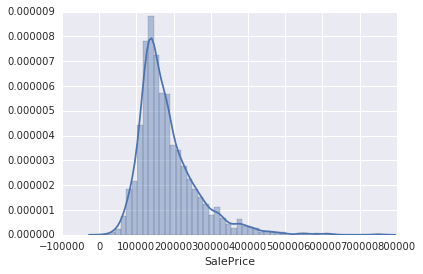

In [5]:
%matplotlib inline
sns.distplot(data["SalePrice"])
plt.show()

The Sale Price distribution is right skewed. Before running prediction models it is worth transforming the data so that the distribution is more normal. I will use the logarithmic transformation.

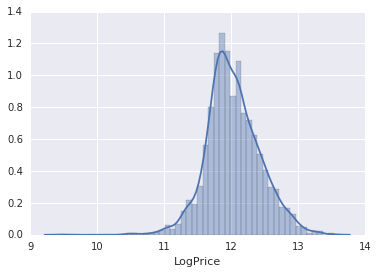

In [6]:
data["LogPrice"] = np.log(data["SalePrice"])
sns.distplot(data["LogPrice"])
plt.show()

__________

Next I will work on looking further at the available features:

# Select appropriate features

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

## Categorical:

* MSSubClass: The building class
* MSZoning: The general zoning classification
* Street: Type of road access
* LotShape: General shape of property
* Utilities: Type of utilities available
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* KitchenQual: Kitchen quality
* MasVnrType: Masonry veneer type
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* GarageCars: Size of garage in car capacity
* Kitchen: Number of kitchens
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* RoofStyle: Type of roof
* RoofMatl: Roof material
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* PavedDrive: Paved driveway
* SaleType: Type of sale
* SaleCondition: Condition of sale
* Electrical: Electrical system
* ExterQual: Exterior material quality
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* LandContour: Flatness of the property
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)

## Timewise:

* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* MoSold: Month Sold
* YrSold: Year Sold

## Numerical:

* LotArea: Lot size in square feet
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* MasVnrArea: Masonry veneer area in square feet
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* GarageArea: Size of garage in square feet
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* MiscVal: $Value of miscellaneous feature

## Deal with numerical columns first

First deal with the numerical columns. Select only columns that really make sense to be classified as numerical, i.e. are not time based or categorical in nature.

*    "Lot Area",
*    "Bsmt Unf SF",
*    "Total Bsmt SF",
*    "Mas Vnr Area",
*    "1st Flr SF",
*    "2nd Flr SF",
*    "Low Qual Fin SF",
*    "Gr Liv Area",
*    "Garage Area",
*    "Wood Deck SF",
*    "Open Porch SF",
*    "Enclosed Porch",
*    "3Ssn Porch",
*    "Screen Porch",
*    "Pool Area",
*    "Misc Val",
*    "SalePrice"

In [7]:
nums = ["Lot Area",
    "Bsmt Unf SF",
    "Total Bsmt SF",
    "Mas Vnr Area",
    "1st Flr SF",
    "2nd Flr SF",
    "Low Qual Fin SF",
    "Gr Liv Area",
    "Garage Area",
    "Wood Deck SF",
    "Open Porch SF",
    "Enclosed Porch",
    "3Ssn Porch",
    "Screen Porch",
    "Pool Area",
    "Misc Val",
    "SalePrice"]
len(nums)

17

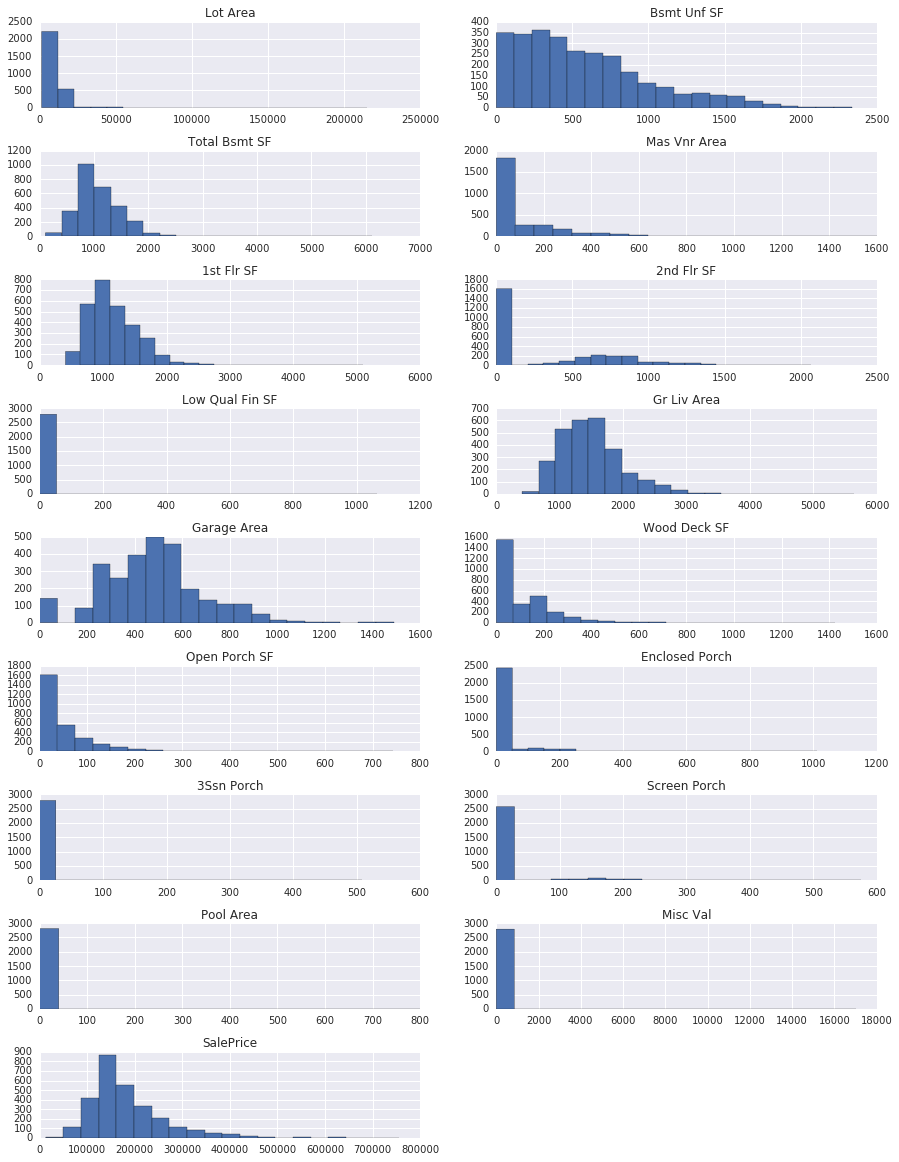

In [8]:
%matplotlib inline
import numpy as np
from numpy import arange

fig = plt.figure(figsize=(15,20))
#adjusting spacing
plt.subplots_adjust(hspace = 0.5)

ax1 = fig.add_subplot(9,2,1)
ax2 = fig.add_subplot(9,2,2)
ax3 = fig.add_subplot(9,2,3)
ax4 = fig.add_subplot(9,2,4)
ax5 = fig.add_subplot(9,2,5)
ax6 = fig.add_subplot(9,2,6)
ax7 = fig.add_subplot(9,2,7)
ax8 = fig.add_subplot(9,2,8)
ax9 = fig.add_subplot(9,2,9)
ax10 = fig.add_subplot(9,2,10)
ax11 = fig.add_subplot(9,2,11)
ax12 = fig.add_subplot(9,2,12)
ax13 = fig.add_subplot(9,2,13)
ax14 = fig.add_subplot(9,2,14)
ax15 = fig.add_subplot(9,2,15)
ax16 = fig.add_subplot(9,2,16)
ax17 = fig.add_subplot(9,2,17)


ax1.hist(data[nums[0]], bins=20)
ax1.set_title(nums[0])
ax2.hist(data[nums[1]], bins=20)
ax2.set_title(nums[1])
ax3.hist(data[nums[2]], bins=20)
ax3.set_title(nums[2])
ax4.hist(data[nums[3]], bins=20)
ax4.set_title(nums[3])
ax5.hist(data[nums[4]], bins=20)
ax5.set_title(nums[4])
ax6.hist(data[nums[5]], bins=20)
ax6.set_title(nums[5])
ax7.hist(data[nums[6]], bins=20)
ax7.set_title(nums[6])
ax8.hist(data[nums[7]], bins=20)
ax8.set_title(nums[7])
ax9.hist(data[nums[8]], bins=20)
ax9.set_title(nums[8])
ax10.hist(data[nums[9]], bins=20)
ax10.set_title(nums[9])
ax11.hist(data[nums[10]], bins=20)
ax11.set_title(nums[10])
ax12.hist(data[nums[11]], bins=20)
ax12.set_title(nums[11])
ax13.hist(data[nums[12]], bins=20)
ax13.set_title(nums[12])
ax14.hist(data[nums[13]], bins=20)
ax14.set_title(nums[13])
ax15.hist(data[nums[14]], bins=20)
ax15.set_title(nums[14])
ax16.hist(data[nums[15]], bins=20)
ax16.set_title(nums[15])
ax17.hist(data[nums[16]], bins=20)
ax17.set_title(nums[16])

In [9]:
from scipy.stats import boxcox

for num in nums[:-1]:
    data[num] = data[num].replace(0,0.1)
    data[num]=boxcox(data[num],0.5)

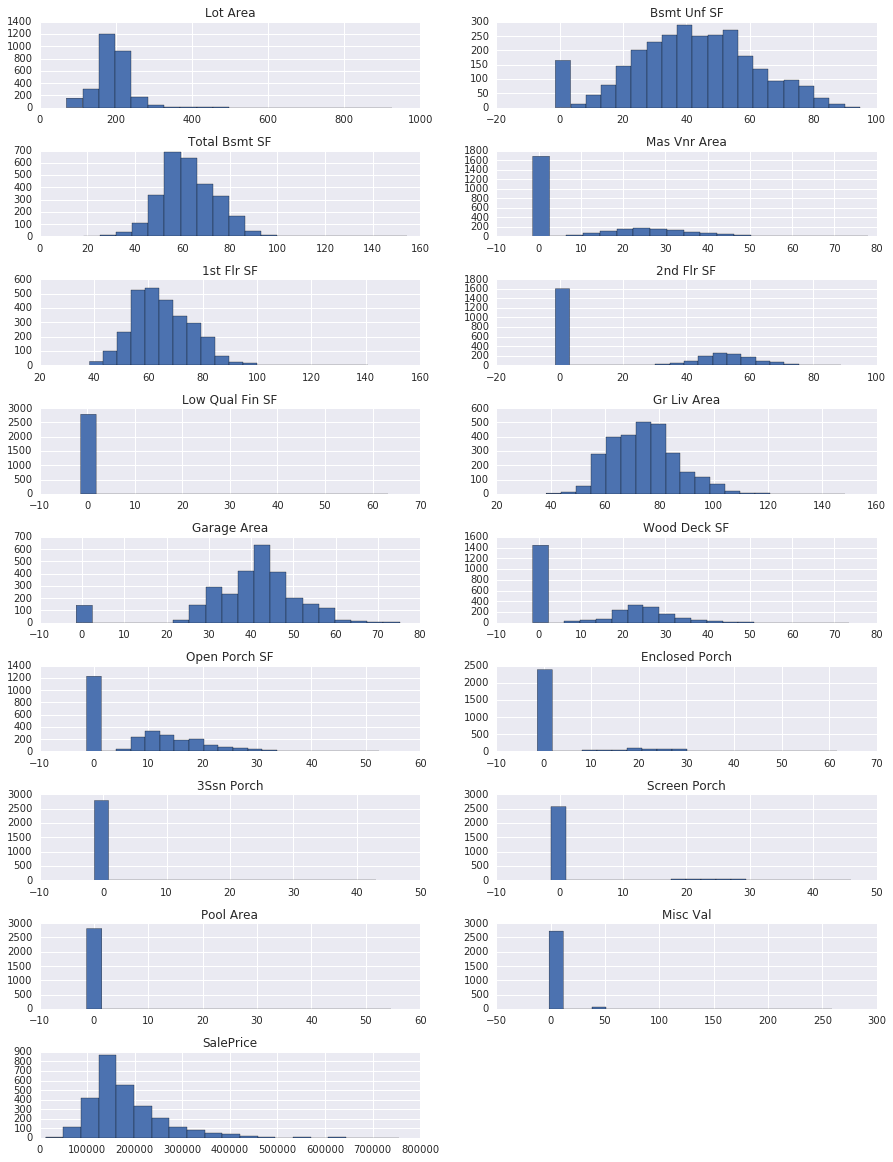

In [10]:
%matplotlib inline
import numpy as np
from numpy import arange

fig = plt.figure(figsize=(15,20))
#adjusting spacing
plt.subplots_adjust(hspace = 0.5)

ax1 = fig.add_subplot(9,2,1)
ax2 = fig.add_subplot(9,2,2)
ax3 = fig.add_subplot(9,2,3)
ax4 = fig.add_subplot(9,2,4)
ax5 = fig.add_subplot(9,2,5)
ax6 = fig.add_subplot(9,2,6)
ax7 = fig.add_subplot(9,2,7)
ax8 = fig.add_subplot(9,2,8)
ax9 = fig.add_subplot(9,2,9)
ax10 = fig.add_subplot(9,2,10)
ax11 = fig.add_subplot(9,2,11)
ax12 = fig.add_subplot(9,2,12)
ax13 = fig.add_subplot(9,2,13)
ax14 = fig.add_subplot(9,2,14)
ax15 = fig.add_subplot(9,2,15)
ax16 = fig.add_subplot(9,2,16)
ax17 = fig.add_subplot(9,2,17)


ax1.hist(data[nums[0]], bins=20)
ax1.set_title(nums[0])
ax2.hist(data[nums[1]], bins=20)
ax2.set_title(nums[1])
ax3.hist(data[nums[2]], bins=20)
ax3.set_title(nums[2])
ax4.hist(data[nums[3]], bins=20)
ax4.set_title(nums[3])
ax5.hist(data[nums[4]], bins=20)
ax5.set_title(nums[4])
ax6.hist(data[nums[5]], bins=20)
ax6.set_title(nums[5])
ax7.hist(data[nums[6]], bins=20)
ax7.set_title(nums[6])
ax8.hist(data[nums[7]], bins=20)
ax8.set_title(nums[7])
ax9.hist(data[nums[8]], bins=20)
ax9.set_title(nums[8])
ax10.hist(data[nums[9]], bins=20)
ax10.set_title(nums[9])
ax11.hist(data[nums[10]], bins=20)
ax11.set_title(nums[10])
ax12.hist(data[nums[11]], bins=20)
ax12.set_title(nums[11])
ax13.hist(data[nums[12]], bins=20)
ax13.set_title(nums[12])
ax14.hist(data[nums[13]], bins=20)
ax14.set_title(nums[13])
ax15.hist(data[nums[14]], bins=20)
ax15.set_title(nums[14])
ax16.hist(data[nums[15]], bins=20)
ax16.set_title(nums[15])
ax17.hist(data[nums[16]], bins=20)
ax17.set_title(nums[16])

In [11]:
def numerical_cols(data, cutoff):

    '''Selects columns based on correlation coefficient cutoff'''
    '''Will select any column with correlation to the target above the cuttoff'''
    '''The function also fills mising values'''
    '''Will return specified columns, but not include the target column'''
    
    #select columns that are numerical and make sense as such
    nums = ["Lot Area",
    "Bsmt Unf SF",
    "Total Bsmt SF",
    "Mas Vnr Area",
    "1st Flr SF",
    "2nd Flr SF",
    "Low Qual Fin SF",
    "Gr Liv Area",
    "Garage Area",
    "Wood Deck SF",
    "Open Porch SF",
    "Enclosed Porch",
    "3Ssn Porch",
    "Screen Porch",
    "Pool Area",
    "Misc Val",
    "SalePrice"]

    num_cols = data[nums]

    #impute missing data
    num_cols = num_cols.fillna(num_cols.mean())

    #Running correlations
    corrs = num_cols.corr()
    sorted_corrs = corrs["SalePrice"].abs().sort_values(ascending = False)

    lista = sorted_corrs[sorted_corrs>cutoff].index.tolist()
    return num_cols[lista[1:]]


In [12]:
numerical_cols(data, 0.4)

,Gr Liv Area,1st Flr SF,Total Bsmt SF,Garage Area,Mas Vnr Area
0,79.387960,79.387960,63.726707,43.956501,19.166010
1,57.866518,57.866518,57.396970,52.037024,-1.367544
2,70.910905,70.910905,70.910905,33.327043,18.784610
3,89.869473,89.869473,89.869473,43.694639,-1.367544
4,78.721744,58.926185,58.926185,41.908997,-1.367544
5,78.099938,58.860496,58.860496,41.358967,6.944272
6,71.157365,71.157365,71.157365,46.249352,-1.367544
7,69.554175,69.554175,69.554175,42.988888,-1.367544
8,78.399005,78.399005,77.874902,47.315312,-1.367544
9,82.947042,62.124878,61.055531,40.047592,-1.367544


# Checking the regression results

In [13]:
d1=numerical_cols(data, 0.5)
d2=data[["LogPrice"]]


def cross_validation(features, target):
    
    #combine features and target
    df = pd.concat([features, target], axis=1)
    
    cols = features.columns.tolist()
    tar = target.columns.tolist()
   
    x = df[cols]
    y = df[tar]
    
    from sklearn.model_selection import cross_val_score, KFold
    
    kf= KFold(5, shuffle = True, random_state =1)
    
    lr = LinearRegression()
    
    mses = cross_val_score(lr, x, y, scoring = "neg_mean_squared_error", cv =kf)
    
    rmses =np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)

    
    return avg_rmse

In [14]:
lista = [0.7,0.6,0.5,0.4,0.3,0.2,0.1]
l = []
for item in lista:
    x = cross_validation(numerical_cols(data, item), data[["LogPrice"]])
    l.append(x)
print(l)

[0.2770920089198229, 0.2424792000745028, 0.22113164874768682, 0.21826752645356748, 0.21017884022952277, 0.21017884022952277, 0.20597309091122346]


0.5 is a good cutoff

In [15]:
def numerical_cols_rescaled(data, cutoff):

    '''Selects columns based on correlation coefficient cutoff'''
    '''Will select any column with correlation to the target above the cuttoff'''
    '''The function also fills mising values'''
    '''Will return specified columns, but not include the target column'''
    
    #select columns that are numerical and make sense as such
    nums = ["Lot Area",
    "Bsmt Unf SF",
    "Total Bsmt SF",
    "Mas Vnr Area",
    "1st Flr SF",
    "2nd Flr SF",
    "Low Qual Fin SF",
    "Gr Liv Area",
    "Garage Area",
    "Wood Deck SF",
    "Open Porch SF",
    "Enclosed Porch",
    "3Ssn Porch",
    "Screen Porch",
    "Pool Area",
    "Misc Val",
    "SalePrice"]

    num_cols = data[nums]

    #impute missing data
    num_cols = num_cols.fillna(num_cols.mean())
    num_cols = abs((num_cols - num_cols.max())/(num_cols.max()-num_cols.min()))

    #Running correlations
    corrs = num_cols.corr()
    sorted_corrs = corrs["SalePrice"].abs().sort_values(ascending = False)

    lista = sorted_corrs[sorted_corrs>cutoff].index.tolist()
    return num_cols[lista[1:]]

In [16]:
lista = [0.7,0.6,0.5,0.4,0.3,0.2,0.1]
l = []
for item in lista:
    x = cross_validation(numerical_cols_rescaled(data, item), data[["LogPrice"]])
    l.append(x)
print(l)

[0.27709200891982294, 0.2424792000745028, 0.22113164874768682, 0.21826752645356748, 0.21017884022952277, 0.21017884022952277, 0.2059730909112234]


Note that rescaling of the features to fit between 1 and 0 did not improve RMSE

# Deal with categorical columns second

In [17]:
categorical = ['MS SubClass',
 'MS Zoning',
 'Street', 
 'Lot Shape', 
 'Land Contour',
 'Utilities', 
 'Lot Config', 
 'Land Slope', 
 'Neighborhood', 
 'Condition 1', 
 'Condition 2', 
 'Bldg Type', 
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Garage Cars',
 'Paved Drive',
 'Sale Type',
 'Sale Condition']

# Work using ANOVA to determina significance of categorical data

For purpose of determining the significance of the categorical columns, I will use the ANOVA analysis, since the outcome variable is continuous.

Example:

In [18]:
categ = data[['Overall Qual','SalePrice']]
#the ANOVA model used does not accept column names with spaces.
categ = categ.rename(columns = {"Overall Qual" : "Qual"})
#check for null values
categ.isnull().sum()

Qual         0
SalePrice    0
dtype: int64

In [19]:
from statsmodels.formula.api import ols
results = ols('SalePrice ~ C(Qual)', data = categ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     715.6
Date:                Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                        18:44:41   Log-Likelihood:                -34173.
No. Observations:                2822   AIC:                         6.837e+04
Df Residuals:                    2812   BIC:                         6.843e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        6.1e+04    4.4e+04      1.386      0.166   -2.53e+04    1.47e+05
C(Qual)[T.2]  -1.149e+04   4.64e+04     -0.248      0.804   -1.02e+05    7.95e+04
C(Qual)[T.3]   1.938e+04   4.48e+04      0.433      0.665   -6.84e+04    1.07e+05
C(Qual)[T.4]   4.685e+04   4.41e+04      1.061      0.289   -3.97e+04    1.33e+05
C(Qual)[T.5]    7.41e+04   4.41e+04      1.682      0.093   -1.23e+04     1.6e+05
C(Qual)[T.6]   1.012e+05   4.41e+04      2.297      0.022    1.48e+04    1.88e+05
C(Qual)[T.7]   1.442e+05   4.41e+04      3.273      0.001    5.78e+04    2.31e+05
C(Qual)[T.8]   2.099e+05   4.41e+04      4.761      0.000    1.23e+05    2.96e+05
C(Qual)[T.9]   3.073e+05   4.42e+04      6.949      0.000    2.21e+05    3.94e+05
C(Qual)[T.10]  3.887e+05   4.48e+04      8.687      0.000    3.01e+05    4.76e+05
==============================================================================
Omnibus:                      548.201   Durbin-Watson:                   1.455
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4216.829
Skew:                           0.706   Prob(JB):                         0.00
Kurtosis:                       8.820   Cond. No.                         185.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
results.rsquared

0.6960854981640696

In [21]:
results.params

Intercept         61000.000000
C(Qual)[T.2]     -11488.888889
C(Qual)[T.3]      19381.666667
C(Qual)[T.4]      46845.522388
C(Qual)[T.5]      74101.996207
C(Qual)[T.6]     101167.950345
C(Qual)[T.7]     144218.336735
C(Qual)[T.8]     209902.917647
C(Qual)[T.9]     307336.766355
C(Qual)[T.10]    388724.566667
dtype: float64

In [22]:
import statsmodels.api as sm

aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

/dataquest/system/env/python3/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  return f(*args, **kwds)


,sum_sq,df,F,PR(>F)
C(Qual),1.248188e+13,9.0,715.622471,0.0
Residual,5.449653e+12,2812.0,NaN,NaN


Let’s break down this ANOVA table. The Qual row is the between groups effect which is the overall experimental effect. The sum of squares for the model (SSM; value 1.31E13 in the table) is how much variance is explained by our model. The current model explains a significant amount of variance, F(9,2920)= 765, p < 0.05. The residual row is the unsystematic variation in the data (SSR; also called the unexplained variance; value 5.56E12in the table). In this case, the unsystematic variation represents the natural individual differences.

In [23]:
# Create a dataframe with just the categorical columns and the target columns:

df_cat = pd.DataFrame()

for cat in categorical:
    categ = data[cat]
    df_cat = pd.concat([df_cat, categ], axis =1)

df_cat = pd.concat([df_cat, data["LogPrice"]], axis =1) 

#drop null
df_cat = df_cat.dropna(how="any")
    
print(df_cat.shape)

(2822, 46)


In [24]:
# Since the ANOVA function used does not allow for column names to have spaces, I will remove the spaces from the names:

#create a dictionary with cleaned names
categorical2 = df_cat.columns.tolist()
l=[]
for cat in categorical2:
    
    a = cat.replace(" ","")
    l.append(a)

dic = {}

for x, cat in zip(l, categorical2):
    dic[cat] = x  

    
#Use the dictionary to rename the columns    
df_cat = df_cat.rename(columns = dic)

#Create a list of column names:
categ = df_cat.columns.tolist()[:-1]

In [25]:
def categcheck(data, categ, significance):
    from statsmodels.formula.api import ols
    
    li={}
    pa={}
    for cat in categ:
        #create a new dataframe:
        da = data[[cat,'LogPrice']]
        #rename column by position
        da = da.rename(columns={ da.columns[0]: "X" })
        results = ols('LogPrice ~ C(X)', data = da).fit()
        r = results.rsquared
        p = results.params
        if r > significance:
            li[cat]=r
            pa[cat]=p
        else:
            continue
        
    return li

In [26]:
categcheck(df_cat, categ, 0.4)

{'BsmtQual': 0.4750696890697904,
 'ExterQual': 0.4636267976054067,
 'GarageCars': 0.5007120313121296,
 'KitchenQual': 0.44207699202515693,
 'Neighborhood': 0.5865266023819163,
 'OverallQual': 0.6800544372909036}

It appears that with the significance level of 0.5 only 4 categorical variables are important. I will choose them for further analysis.

## One Hot Encode Significant Categorical Columns

In [27]:
a = categcheck(df_cat, categ, 0.4)

categorical = []
for key, value in a.items():
    categorical.append(key)
print(categorical)    

['ExterQual', 'OverallQual', 'GarageCars', 'KitchenQual', 'Neighborhood', 'BsmtQual']


In [28]:
#Insert the spaces back into column names:

import re

lista = []
for category in categorical:
    new = re.sub(r"(\w)([A-Z])", r"\1 \2", category)
    lista.append(new)
categorical = lista

categorical

['Exter Qual',
 'Overall Qual',
 'Garage Cars',
 'Kitchen Qual',
 'Neighborhood',
 'Bsmt Qual']

In [29]:
#Do one hot encoding
categorical_cols = pd.DataFrame()

for cat in categorical:
    dummy = pd.get_dummies(data[cat], drop_first = True)
    categorical_cols = pd.concat([categorical_cols, dummy], axis =1)

In [30]:
categorical_cols.columns.tolist()

['Fa',
 'Gd',
 'TA',
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 1.0,
 1.7668146124957322,
 2.0,
 3.0,
 4.0,
 5.0,
 'Fa',
 'Gd',
 'Po',
 'TA',
 'Blueste',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'Greens',
 'GrnHill',
 'IDOTRR',
 'Landmrk',
 'MeadowV',
 'Mitchel',
 'NAmes',
 'NPkVill',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'SWISU',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'StoneBr',
 'Timber',
 'Veenker',
 'Fa',
 'Gd',
 'Po',
 'TA']

# Checking the model with numerical and categorical variables

In [31]:
all_cols = pd.concat([categorical_cols, numerical_cols(data, 0.5)], axis = 1)
d2=data[["LogPrice"]]

cross_validation(all_cols, d2)

0.15038304234212446

# Working with time based features

## Timewise:

* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* MoSold: Month Sold
* YrSold: Year Sold

A useful variable to look at would be the age of the house at the time it was sold. This number can be easily derived having the year built and year sold data available.

There is a visible relationship between the sale price and the age of a house.

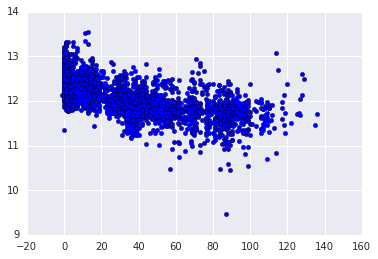

In [32]:
# convert features to age at sale
data["AgeAtSale"]=data["Yr Sold"]-data["Year Built"]

%matplotlib inline
plt.scatter(data["AgeAtSale"],data["LogPrice"])
plt.show()

There appears to be a similar but much weaker trend in terms of years since a house was last remodeled:

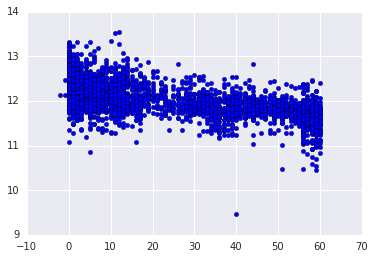

In [33]:
data["YrsWoRemodel"]=data["Yr Sold"]-data["Year Remod/Add"]

%matplotlib inline
plt.scatter(data["YrsWoRemodel"],data["LogPrice"])
plt.show()

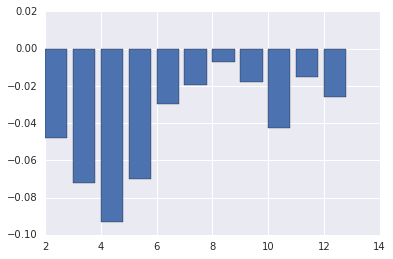

In [34]:
data["MoSold"] = data["Mo Sold"]

%matplotlib inline

results = ols('LogPrice ~ C(MoSold)', data = data).fit()
a=results.params
a=a[1:]

%matplotlib inline
plt.bar((2,3,4,5,6,7,8,9,10,11,12) ,a)
plt.show()

Include age and years since last remodel as numerical categories in the model:

In [35]:
def numerical_cols(data, cutoff):

    '''Selects columns based on correlation coefficient cutoff'''
    '''Will select any column with correlation to the target above the cuttoff'''
    '''The function also fills mising values'''
    '''Will return specified columns, but not include the target column'''
    
    #select columns that are numerical and make sense as such
    nums = ["Lot Area",
    "Bsmt Unf SF",
    "Total Bsmt SF",
    "Mas Vnr Area",
    "1st Flr SF",
    "2nd Flr SF",
    "Low Qual Fin SF",
    "Gr Liv Area",
    "Garage Area",
    "Wood Deck SF",
    "Open Porch SF",
    "Enclosed Porch",
    "3Ssn Porch",
    "Screen Porch",
    "Pool Area",
    "Misc Val",
    "YrsWoRemodel",
    "AgeAtSale",    
    "LogPrice"]

    num_cols = data[nums]

    #impute missing data
    num_cols = num_cols.fillna(num_cols.mean())

    #Running correlations
    corrs = num_cols.corr()
    sorted_corrs = corrs["LogPrice"].abs().sort_values(ascending = False)

    lista = sorted_corrs[sorted_corrs>cutoff].index.tolist()
    return num_cols[lista[1:]]


In [36]:
numerical_cols(data, 0.5)

,Gr Liv Area,1st Flr SF,Total Bsmt SF,AgeAtSale,Garage Area,YrsWoRemodel
0,79.387960,79.387960,63.726707,50,43.956501,50
1,57.866518,57.866518,57.396970,49,52.037024,49
2,70.910905,70.910905,70.910905,52,33.327043,52
3,89.869473,89.869473,89.869473,42,43.694639,42
4,78.721744,58.926185,58.926185,13,41.908997,12
5,78.099938,58.860496,58.860496,12,41.358967,12
6,71.157365,71.157365,71.157365,9,46.249352,9
7,69.554175,69.554175,69.554175,18,42.988888,18
8,78.399005,78.399005,77.874902,15,47.315312,14
9,82.947042,62.124878,61.055531,11,40.047592,11


In [37]:
all_cols = pd.concat([categorical_cols, numerical_cols(data, 0.5)], axis = 1)
d2=data[["LogPrice"]]

cross_validation(all_cols, d2)

0.14679310178665012

------

So far the RMSE is $30,381

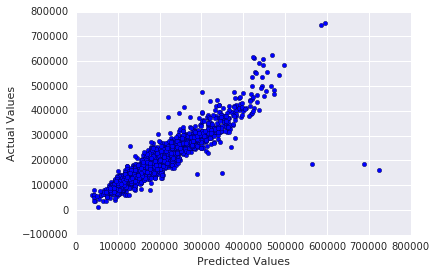

In [38]:
lr = LinearRegression()

x = all_cols
y= d2

lr.fit(x,y)
predictions = lr.predict(x)

%matplotlib inline
predictions = np.exp(predictions)
y = data["SalePrice"]
plt.scatter(predictions,y)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

________


In [39]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y,predictions))

30013.25513732033